<a href="https://colab.research.google.com/github/enjoyPG/2023Gifted/blob/main/students/jwoo428/20230319/%EC%9D%B4%EC%A4%80%EC%9A%B0_%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_6_3%EC%A3%BC%EC%84%B1%EB%B6%84_%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#6-3주성분 분석


#핵심키워드
###차원축소
* 원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류이다.
* 차원축소는 저장공간을 줄이고 시각화하기 쉬움.
* 다른 알고리즘의 성능을 높일 수 있음
###주성분 분석
* 차원축소 알고리즘의 하나, 데이터에서 가장 분산이 큰 방향을 찾는 방법이다.
* 이런 방향을 주성분이라고 부름.
* 원본데이터를 주성분에 투영하여 새로운 특성을 만들 수 있슴.
* 일반적으로 주성분은 원본데이터에 있는 특성개수보다 작다.
###설명된 분산
* 주성분 분석에서 주성분이 얼마나 원본데이터의 분산을 잘 나타내는지 기록한 것.
* 사이킷런의 PCA클래스는 주성분 개수나 설명된 분산의 비율을 지정하여 주성분 분석을 수행함

###차원과 차원축소
* 데이터가 가진속성을 특성이라고 부르는데 이 특성이 곧 차원임.
* 차원을 줄이면 저장공간을 절약할 수 있음

###차원축소 알고리즘
* 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 지도 학습 모델의 성능을 향상시킬 수 있음
* 대표적인 차원축소 알고리즘 주성분분석(PCA)

###주성분 분석
* 주성분 분석을 데이터에 있는 분산이 큰 방향을 찾는것이다.(분산이란 데이터가 널리 퍼져있는 정도)
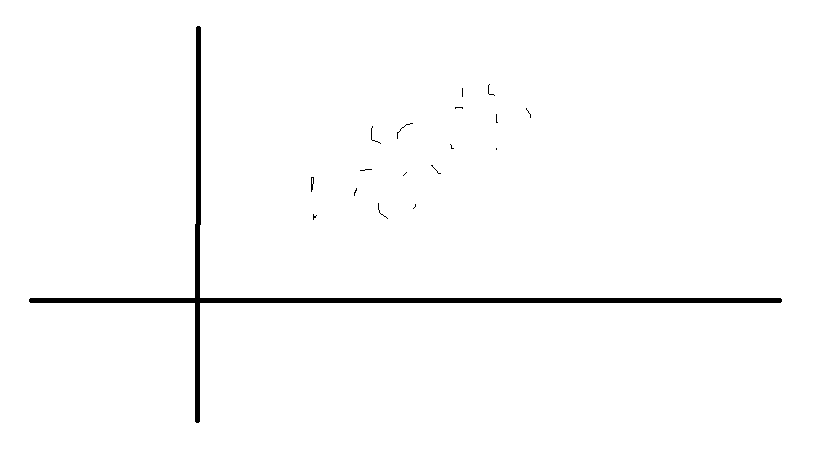
해당 2차원 데이터 에서 분산이 가장 큰 방향은
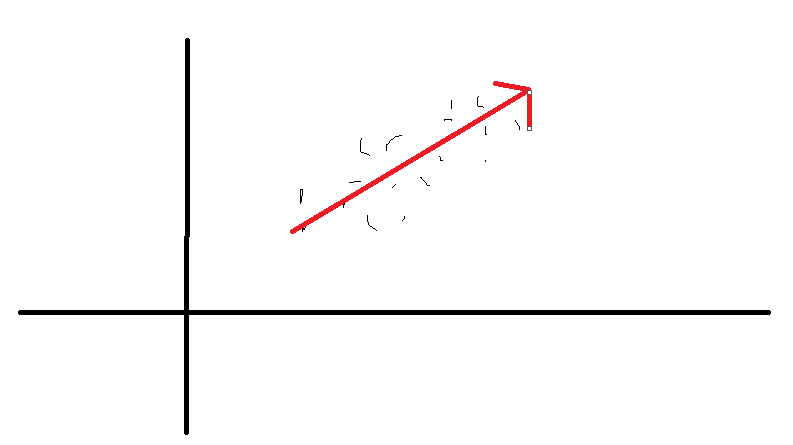
인 것을 알 수 있다.
또한 이 직선이 원점에서 출발한다면 두 원소로 이루어진 벡터로 쓸수 있다.
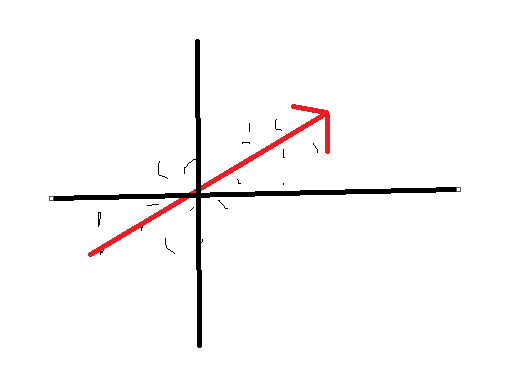
이 벡터를 주성분 이라고 부르는데 주성분 벡터의 원소개수는 원본 데이터셋에 있는 특성 개수와 같다. 하지만 원본 데이터는 주성분을 사용해 차원을 줄일 수 있다. 
** 주성분은 원본 차원과 같고, 주성분으로 바꾼 데이터는 차원이 줄어든다 **
첫번째 주성분을 찾은 다음 이 벡터에 수직이고 분산이 가장 큰 다음 방향을 찾는다. 
이 벡터가 두번째 주성분인데 여기 부터 2차원이기때문에 두번째 주성분의 방향은 하나밖에 존재하지 않음.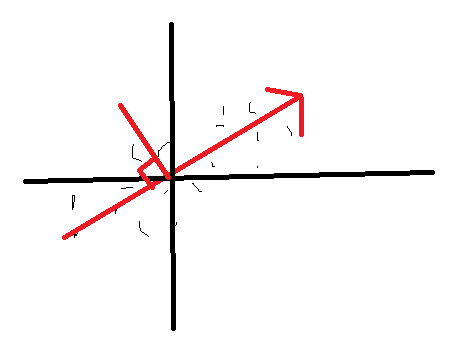

###PCA클래스

In [2]:
!wget https:// bit.ly/fruits_300_data -O fruits_300.npy
import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1,100*100)


https://: Invalid host name.
--2023-03-19 04:48:52--  http://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2023-03-19 04:48:52--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2023-03-19 04:48:52--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|18

In [4]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [6]:
print(pca.components_.shape)

(50, 10000)


In [18]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n = len(arr)
  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio,rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

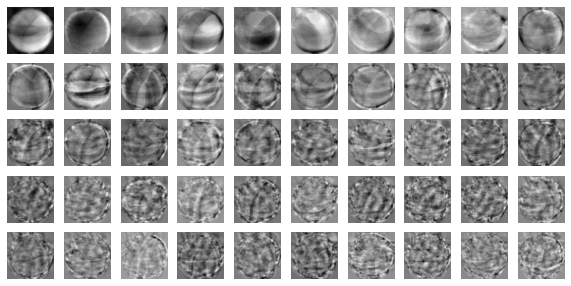

In [19]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [20]:
print(fruits_2d.shape)

(300, 10000)


In [21]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


###원본데이터 재구성
* 앞에서 10000개의 특성을 50개로 줄였다.
* 이때 원본데이터를 상당 부분 재구성할 수 있다.

In [22]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


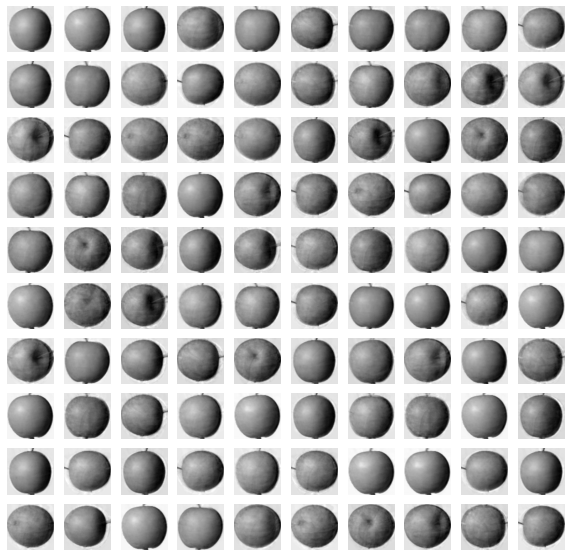

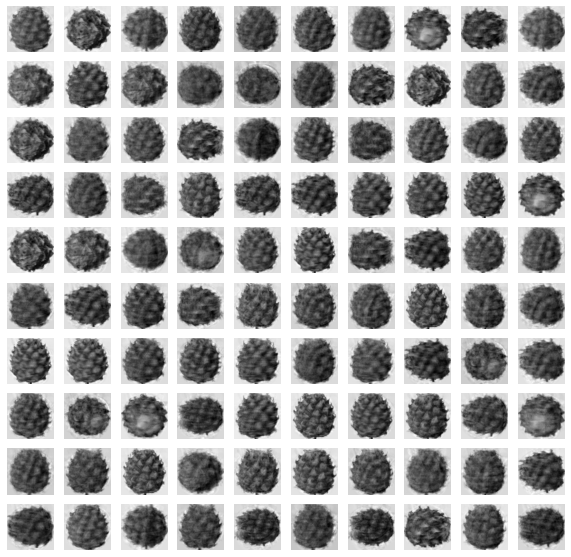

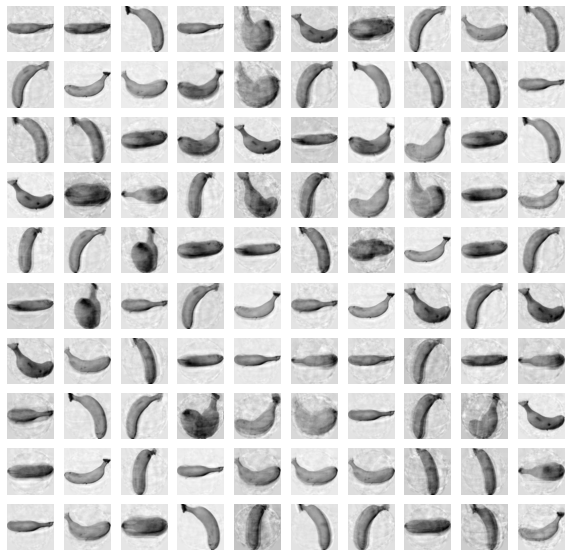

In [23]:
fruits_reconstruct = fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

###설명된 분산
* 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 설명된 분산이라고 함

In [24]:
print(np.sum(pca.explained_variance_ratio_))

0.9215254886005326


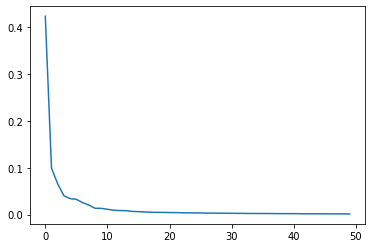

In [25]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

* 처음 10개의 주성분이 대부분의 분산을 표현하고 있음, 그다음부터는 각 주성분이 설명하고 있는 분산은 비교적 작음.

###다른 알고리즘과 함께 사용하기

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
target = np.array([0]*100 + [1]*100 + [2]*100)

In [27]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr,fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.9217195987701416


In [28]:
scores = cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.021210718154907226


*PCA로 차원을 축소하면 저장공간뿐만 아니라 머신러닝 모델의 훈련속도도 높일 수 있음

In [29]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [30]:
print(pca.n_components_)

2


In [31]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [32]:
scores = cross_validate(lr,fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.03093571662902832


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [33]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3,random_state=42)
km.fit(fruits_2d)
print(np.unique(km.labels_,return_counts=True))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(array([0, 1, 2], dtype=int32), array([111,  98,  91]))


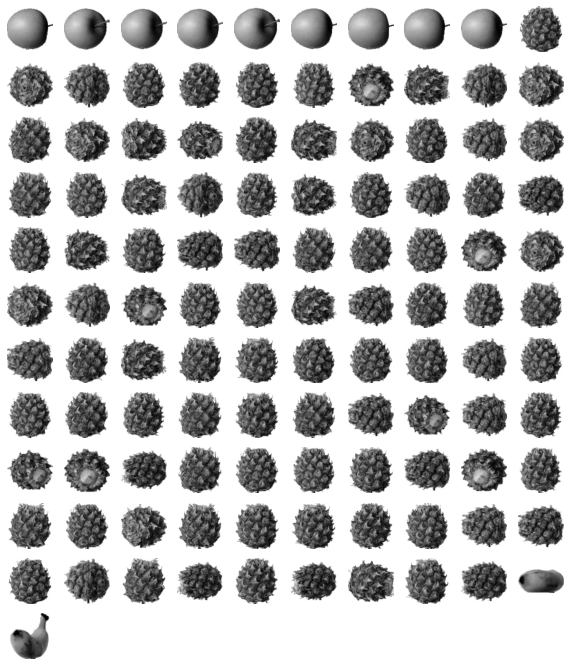

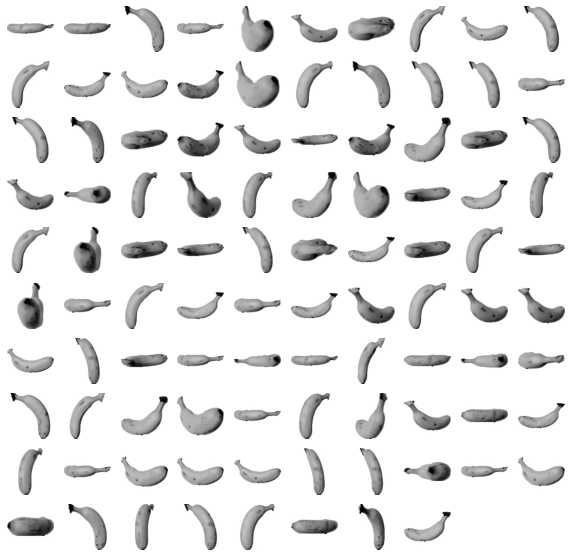

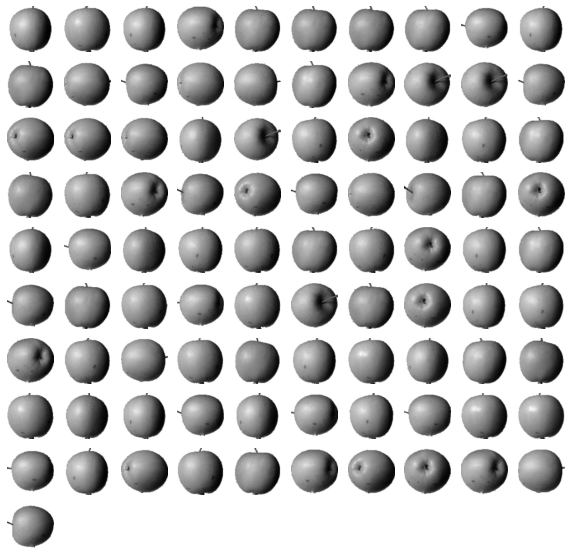

In [34]:
  for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

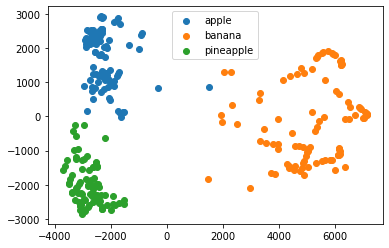

In [37]:
for label in range(0,3):
  data = fruits_pca[km.labels_==label]
  plt.scatter(data[:,0], data[:,1])
plt.legend(['apple','banana','pineapple'])
plt.show()